# Postprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 16})
figsize = (12, 8)

# extracting data

In [30]:
df = pd.read_csv("../data/results/results.csv")
df.loc[0]['obj_val']
filenames = df.loc[0:7]['inst_file']
filenames
min_vals = []
for filename in filenames:
    file_df = df[df['inst_file'] == filename]
    min_vals.append(file_df["obj_val"].min())

df.loc[32:64]

,inst_file,N,T,max_useless_gens,overlap,selected_percentage,recomb_meth,n_elites,selection_pressure,time,obj_val
32,heur041_n_300_m_17492.txt,100,0,100,0.2,0.5,1.0,1,1.9,131.911513,6738.0
33,heur044_n_300_m_3234.txt,100,0,100,0.2,0.5,1.0,1,1.9,104.316409,3656.0
34,heur048_n_300_m_14666.txt,100,0,100,0.2,0.5,1.0,1,1.9,178.864340,29937.0
35,heur052_n_300_m_26628.txt,100,0,100,0.2,0.5,1.0,1,1.9,34.174153,31792.0
36,heur053_n_300_m_39861.txt,100,0,100,0.2,0.5,1.0,1,1.9,24.853390,11059.0
37,heur055_n_300_m_5164.txt,100,0,100,0.2,0.5,1.0,1,1.9,115.025628,4691.0
38,heur058_n_300_m_4010.txt,100,0,100,0.2,0.5,1.0,1,1.9,309.579936,5583.0
39,heur060_n_300_m_12405.txt,100,0,100,0.2,0.5,1.0,1,1.9,262.448425,18483.0
40,heur041_n_300_m_17492.txt,100,0,100,0.1,0.5,1.0,1,1.9,126.241319,6989.0
41,heur044_n_300_m_3234.txt,100,0,100,0.1,0.5,1.0,1,1.9,84.534978,3965.0


# parameter search plotting

Text(0.5, 0, 'population size N')

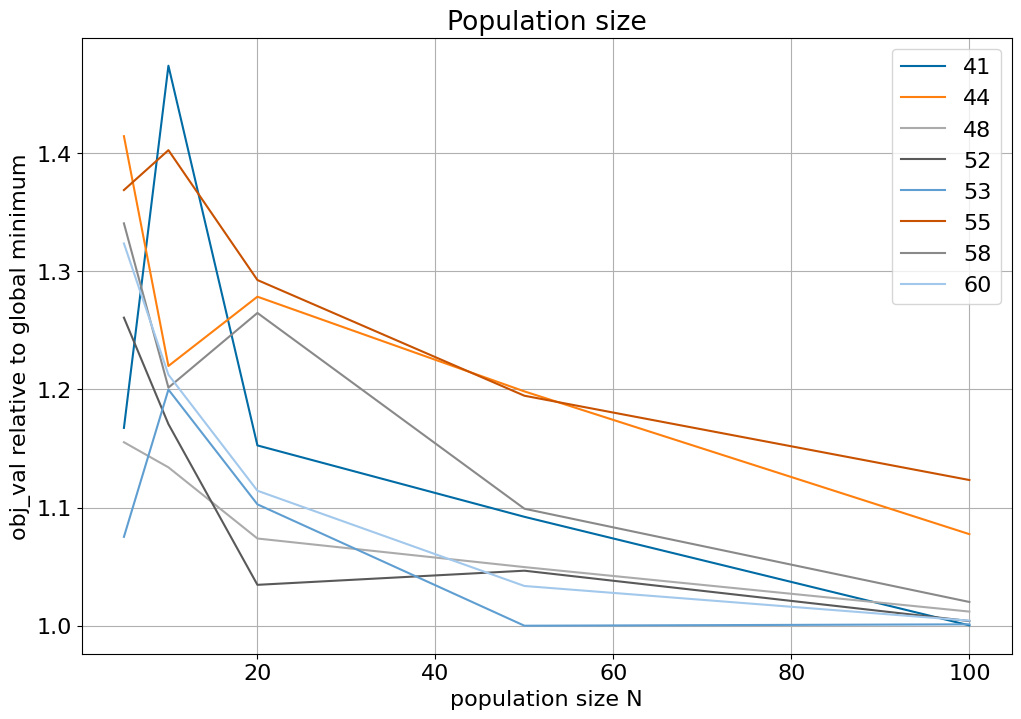

In [36]:
Ns = [5,10,20,50,100]

fig = plt.figure(figsize=figsize)
ax = plt.axes()

for i in range(8):
        ax.plot(Ns,[df.loc[i+j]['obj_val']/min_vals[i] for j in [0,8,16,24,32]],label=filenames[i][5:7])

ax.legend()
ax.grid()
ax.set_title("Population size")
ax.set_ylabel("obj_val relative to global minimum")
ax.set_xlabel("population size N")


# overlap

Text(0.5, 0, 'population size N')

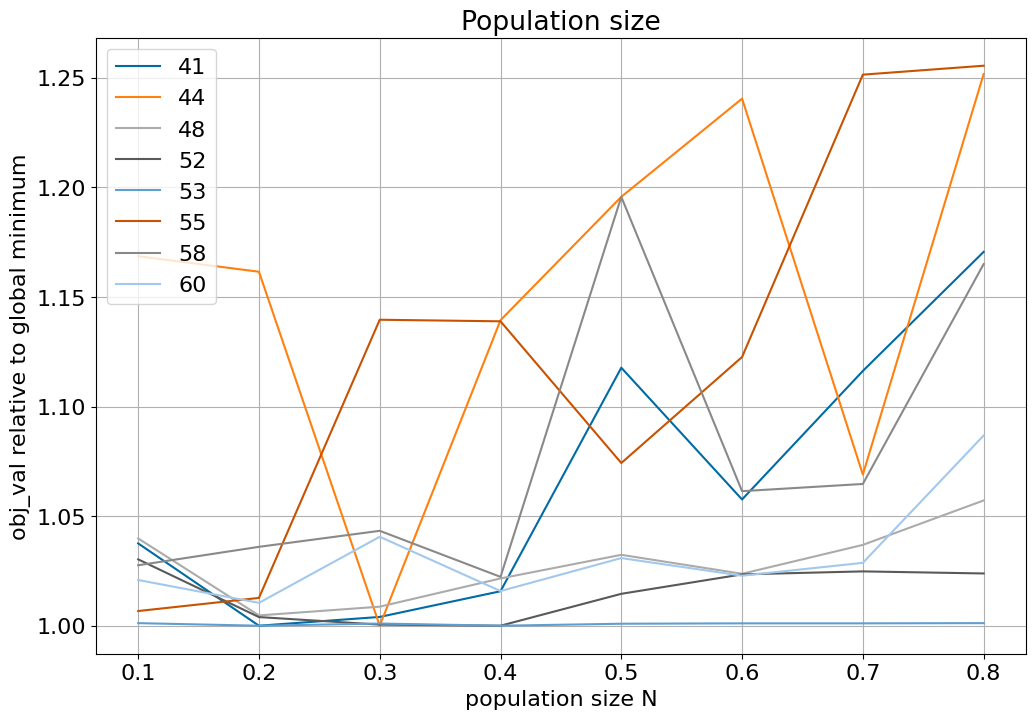

In [40]:
overlaps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

fig = plt.figure(figsize=figsize)
ax = plt.axes()

for i in range(8):
        #print(df.loc[40+i+16])
        ax.plot(overlaps,[df.loc[40+i+j]['obj_val']/min_vals[i] for j in [0,8,16,24,32,40,48,56]],label=filenames[i][5:7])

ax.legend()
ax.grid()
ax.set_title("Population size")
ax.set_ylabel("obj_val relative to global minimum")
ax.set_xlabel("population size N")

# selected percentage

In [ ]:
overlaps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

fig = plt.figure(figsize=figsize)
ax = plt.axes()

for i in range(8):
        #print(df.loc[40+i+16])
        ax.plot(overlaps,[df.loc[40+i+j]['obj_val']/min_vals[i] for j in [0,8,16,24,32,40,48,56]],label=filenames[i][5:7])

ax.legend()
ax.grid()
ax.set_title("Population size")
ax.set_ylabel("obj_val relative to global minimum")
ax.set_xlabel("population size N")